<center><img src="https://github.com/hse-ds/iad-applied-ds/blob/master/2021/hw/hw1/img/logo_hse.png?raw=1" width="1000"></center>

<h1><center>Прикладные задачи анализа данных</center></h1>
<h2><center>Домашнее задание 3: Прогнозирование временных рядов</center></h2>

# Введение

В этом задании Вам предстоит разобраться с основами анализа и прогнозирования временных рядов. 


![image](https://imgs.xkcd.com/comics/extrapolating.png)

In [144]:
!pip install orbit-ml
!pip install prophet
!pip install sktime[all_extras]

In [145]:
%matplotlib inline

from IPython import display
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

## Задание 1 (1 балл). Поиск и предобработка данных.

В этом задании Вам необходимо _самостоятельно_ найти два временных ряда: один должен обладать месячной частотой, а второй — дневной.

Мы советуем поискать соответствующие временные ряды на платформе [kaggle](https://www.kaggle.com/datasets) или же взять один из [популярных](https://medium.com/analytics-vidhya/10-time-series-datasets-for-practice-d14fec9f21bc) временных рядов для анализа. 

**Не рекомендуется** использовать в качестве временных рядов цены финансовых инструментов в силу плохой предсказуемости изменения цен. **Запрещается** использовать готовые наборы данных из библиотек для анализа временных рядов, например, `from orbit.utils.dataset import load_iclaims`.

![bitcoin](https://avatars.mds.yandex.net/get-zen_doc/3417386/pub_6017dd4b8d30cb1780864ae0_6017f4aa8d30cb1780bf66ce/scale_1200)




В качестве отчета по заданию:

* Опишите источники временных рядов (ссылки на страницы скачивания). В случае, если данные требовали дополнительной обработки, приведите код этой обработки, загрузите данные в личное облачное хранилище и приведите ссылку на скачивание. Процесс получения временных рядов должен быть **четко** расписан и полностью **воспроизводиться**. 

* Приведите код считывания временных рядов из файлов и разделения на train/test. Соотношение размеров train/test на Ваше усмотрение, но мы советуем Вам выбрать 80% на 20%, если в test остаётся хотя бы пара лет наблюдений.



Датасет взят по ссылке https://portal.edirepository.org/nis/mapbrowse?packageid=knb-lter-mcr.5.25. Загрузка данных в соотвествии с примером python-скрипта, приведенного на сайте, в котором и озаглавлены все колонки.

В датасете содержатся данные о среднемесячной температуре поверхности моря, концентрации хлорофилла, коэффициенты обратного рассеяния частиц и прочие данные, полученные вокруг острова Муреа во Французской Полинезии. Получены со спутников, усреднены за месяц. Для исследования выбрана температура.

In [146]:
df1 =pd.read_csv("http://pasta.lternet.edu/package/data/eml/knb-lter-mcr/5/25/dee78fa641cd7550765c248cc13bb010", skiprows=1, sep=",", names=[
                    "Year",     
                    "Month",     
                    "first_day",     
                    "last_day",     
                    "mean_chl_seawifs",     
                    "stdev_chl_seawifs",     
                    "chl_anomaly_seawifs",     
                    "pct_valid_chl_seawifs",     
                    "mean_chl_aqua",     
                    "stdev_chl_aqua",     
                    "chl_anomaly_aqua",     
                    "pct_valid_chl_aqua",     
                    "cdm_mean_seawifs",     
                    "cdm_stdev_seawifs",     
                    "cdm_anomaly_seawifs",     
                    "pct_valid_cdm_seawifs",     
                    "cdm_mean_aqua",     
                    "cdm_stdev_aqua",     
                    "cdm_anomaly_aqua",     
                    "pct_valid_cdm_aqua",     
                    "mean_bbp_aqua",     
                    "stdev_bbp_aqua",     
                    "bbp_anomaly_aqua",     
                    "pct_valid_bbp_aqua",     
                    "mean_nsst_aqua",     
                    "stdev_nsst_aqua",     
                    "nsst_anomaly_aqua",     
                    "pct_valid_nsst_aqua"    ]
            ,parse_dates=[
                        'Year',
                ] 
            ,na_values={
                  'mean_chl_seawifs':[
                          '-999.000',],
                  'stdev_chl_seawifs':[
                          '-999.000',],
                  'chl_anomaly_seawifs':[
                          '-999.000',],
                  'pct_valid_chl_seawifs':[
                          '-999.000',],
                  'mean_chl_aqua':[
                          '-999.000',],
                  'stdev_chl_aqua':[
                          '-999.000',],
                  'chl_anomaly_aqua':[
                          '-999.000',],
                  'pct_valid_chl_aqua':[
                          '-999.000',],
                  'cdm_mean_seawifs':[
                          '-999.000',],
                  'cdm_stdev_seawifs':[
                          '-999.000',],
                  'cdm_anomaly_seawifs':[
                          '-999.000',],
                  'pct_valid_cdm_seawifs':[
                          '-999.000',],
                  'cdm_mean_aqua':[
                          '-999.000',],
                  'cdm_stdev_aqua':[
                          '-999.000',],
                  'cdm_anomaly_aqua':[
                          '-999.000',],
                  'pct_valid_cdm_aqua':[
                          '-999.000',],
                  'mean_bbp_aqua':[
                          '-999.000',],
                  'stdev_bbp_aqua':[
                          '-999.000',],
                  'bbp_anomaly_aqua':[
                          '-999.000',],
                  'pct_valid_bbp_aqua':[
                          '-999.000',],
                  'mean_nsst_aqua':[
                          '-999.000',],
                  'stdev_nsst_aqua':[
                          '-999.000',],
                  'nsst_anomaly_aqua':[
                          '-999',],
                  'pct_valid_nsst_aqua':[
                          '-999.000',],} )

In [147]:
df1

,Year,Month,first_day,last_day,mean_chl_seawifs,stdev_chl_seawifs,chl_anomaly_seawifs,pct_valid_chl_seawifs,mean_chl_aqua,stdev_chl_aqua,...,cdm_anomaly_aqua,pct_valid_cdm_aqua,mean_bbp_aqua,stdev_bbp_aqua,bbp_anomaly_aqua,pct_valid_bbp_aqua,mean_nsst_aqua,stdev_nsst_aqua,nsst_anomaly_aqua,pct_valid_nsst_aqua
0,1997-01-01,1,1,31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1997-01-01,2,1,28,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1997-01-01,3,1,31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1997-01-01,4,1,30,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1997-01-01,5,1,31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,2020-01-01,8,1,31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284,2020-01-01,9,1,30,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285,2020-01-01,10,1,31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
286,2020-01-01,11,1,30,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [148]:
print("Shape of dataset is", df1.shape)
print("# of NaN in each columns:", df1.isnull().sum(), sep='\n')

Shape of dataset is (288, 28)
# of NaN in each columns:
Year                       0
Month                      0
first_day                  0
last_day                   0
mean_chl_seawifs         135
stdev_chl_seawifs        135
chl_anomaly_seawifs      135
pct_valid_chl_seawifs    135
mean_chl_aqua             74
stdev_chl_aqua            74
chl_anomaly_aqua          74
pct_valid_chl_aqua        74
cdm_mean_seawifs         136
cdm_stdev_seawifs        136
cdm_anomaly_seawifs      136
pct_valid_cdm_seawifs    136
cdm_mean_aqua             75
cdm_stdev_aqua            75
cdm_anomaly_aqua          75
pct_valid_cdm_aqua        75
mean_bbp_aqua             75
stdev_bbp_aqua            75
bbp_anomaly_aqua          75
pct_valid_bbp_aqua        75
mean_nsst_aqua            75
stdev_nsst_aqua           75
nsst_anomaly_aqua         75
pct_valid_nsst_aqua       75
dtype: int64


In [149]:
a = (df1['Year'].astype(str)).apply(lambda x: x[0:4]) + '-' + df1['Month'].astype(str)
a

0       1997-1
1       1997-2
2       1997-3
3       1997-4
4       1997-5
        ...   
283     2020-8
284     2020-9
285    2020-10
286    2020-11
287    2020-12
Length: 288, dtype: object

In [150]:
df1['Year'] = a
df1 = df1[['Year', 'mean_nsst_aqua']]  # оставляем только обозначенные столбцы в датасете  # near-sea-surface temperature (NSST)
df1 = df1.dropna()
df1.head(5)

,Year,mean_nsst_aqua
66,2002-7,26.466053
67,2002-8,26.303237
68,2002-9,26.407822
69,2002-10,26.944604
70,2002-11,27.579759


In [151]:
df1 = df1.rename(columns={"Year": "date"})
df1.head(2)

,date,mean_nsst_aqua
66,2002-7,26.466053
67,2002-8,26.303237


In [152]:
print("Shape of dataset is", df1.shape)
print("# of NaN in each columns:", df1.isnull().sum(), sep='\n')

Shape of dataset is (213, 2)
# of NaN in each columns:
date              0
mean_nsst_aqua    0
dtype: int64


In [153]:
df1['date'].unique()

array(['2002-7', '2002-8', '2002-9', '2002-10', '2002-11', '2002-12',
       '2003-1', '2003-2', '2003-3', '2003-4', '2003-5', '2003-6',
       '2003-7', '2003-8', '2003-9', '2003-10', '2003-11', '2003-12',
       '2004-1', '2004-2', '2004-3', '2004-4', '2004-5', '2004-6',
       '2004-7', '2004-8', '2004-9', '2004-10', '2004-11', '2004-12',
       '2005-1', '2005-2', '2005-3', '2005-4', '2005-5', '2005-6',
       '2005-7', '2005-8', '2005-9', '2005-10', '2005-11', '2005-12',
       '2006-1', '2006-2', '2006-3', '2006-4', '2006-5', '2006-6',
       '2006-7', '2006-8', '2006-9', '2006-10', '2006-11', '2006-12',
       '2007-1', '2007-2', '2007-3', '2007-4', '2007-5', '2007-6',
       '2007-7', '2007-8', '2007-9', '2007-10', '2007-11', '2007-12',
       '2008-1', '2008-2', '2008-3', '2008-4', '2008-5', '2008-6',
       '2008-7', '2008-8', '2008-9', '2008-10', '2008-11', '2008-12',
       '2009-1', '2009-2', '2009-3', '2009-4', '2009-5', '2009-6',
       '2009-7', '2009-8', '2009-9', '200

В получившемся 12-летнем диапазоне пропусков в данных нет. Строки в датасете упорядочены по дате (при вызове .unique() убедились дополнительно в этом). Будем измерять NNST - Near Sea Surface Temperature (Температура у поверхности моря).

В качестве ежедневного датасета взяла датасет отсюда: https://www.kaggle.com/datasets/cityofLA/los-angeles-traffic-collision-data. Содержит информацию об авариях в Лос-Анджелесе с 2010 года. Каждая строчка - информация о конкретной аварии. При предобработке датасета я создала столбец с информацией о количестве аварий в данный день путем подсчета строк с уникальной датой. Удалила всё, кроме даты и количества аварий в данный день.

In [ ]:
!pwd

/content


In [ ]:
!mkdir ./data/
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1_FDcfQ0o0fEJ2UQxZpUhuXfziLCWoCtm' -O ./data/a.zip

mkdir: cannot create directory ‘./data/’: File exists
--2022-04-24 20:05:42--  https://docs.google.com/uc?export=download&id=1_FDcfQ0o0fEJ2UQxZpUhuXfziLCWoCtm
Resolving docs.google.com (docs.google.com)... 142.250.81.206, 2607:f8b0:4004:82f::200e
Connecting to docs.google.com (docs.google.com)|142.250.81.206|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0g-1o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/sgqjjdtnl16q6kbs03m57uu812j83v57/1650830700000/08365649574845997065/*/1_FDcfQ0o0fEJ2UQxZpUhuXfziLCWoCtm?e=download [following]
--2022-04-24 20:05:44--  https://doc-0g-1o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/sgqjjdtnl16q6kbs03m57uu812j83v57/1650830700000/08365649574845997065/*/1_FDcfQ0o0fEJ2UQxZpUhuXfziLCWoCtm?e=download
Resolving doc-0g-1o-docs.googleusercontent.com (doc-0g-1o-docs.googleusercontent.com)... 142.250.188.33, 2607:f8b0:4004:835::2001
Connecting to doc-0g-1o-do

In [ ]:
!unzip './data/a.zip' -d './Dataset'

Archive:  ./data/a.zip
replace ./Dataset/socrata_metadata.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [154]:
df2 =pd.read_csv("/content/Dataset/traffic-collision-data-from-2010-to-present.csv")
df2 = df2.drop_duplicates()
df2 = df2[["Date Occurred"]]
df2.tail(5)

,Date Occurred
502853,2010-01-01T00:00:00.000
502854,2010-01-01T00:00:00.000
502855,2010-01-01T00:00:00.000
502856,2010-01-01T00:00:00.000
502857,2010-01-01T00:00:00.000


In [155]:
df2 = df2.dropna()
df2 = df2.rename(columns={"Date Occurred": "date"})
a = (df2['date'].astype(str)).apply(lambda x: x[:10])
df2['date'] = a
df2.head(3)

,date
0,2019-11-30
1,2019-11-30
2,2019-11-30


In [156]:
df2 = df2.sort_values(by = "date")
df2.head(2)

,date
502857,2010-01-01
502767,2010-01-01


In [157]:
a = df2.groupby('date').date.count()
a = a.to_numpy()
df2 = pd.DataFrame(df2['date'].unique(), columns=['date'])
df2['collisions'] = a
df2.head(3)

,date,collisions
0,2010-01-01,122
1,2010-01-02,79
2,2010-01-03,99


In [158]:
df2 = df2[:-1]
df2.tail(6)

,date,collisions
3614,2019-11-24,108
3615,2019-11-25,103
3616,2019-11-26,95
3617,2019-11-27,93
3618,2019-11-28,49
3619,2019-11-29,43


In [159]:
train_split1 = int(len(df1) * 0.8)
train_split2 = int(len(df2) * 0.79)
X1_train, y1_train, X1_test, y1_test = df1[:train_split1]['date'], df1[:train_split1]['mean_nsst_aqua'], df1[train_split1:]['date'], df1[train_split1:]['mean_nsst_aqua']
X2_train, y2_train, X2_test, y2_test = df2[:train_split2]['date'], df2[:train_split2]['collisions'], df2[train_split2:]['date'], df2[train_split2:]['collisions']
print("# of years in test samples:\n1:", len(y1_test)/12, "\n2:", len(y2_test)/365)

# of years in test samples:
1: 3.5833333333333335 
2: 2.084931506849315


## Задание 2. Анализ временных рядов (1 балл).

* Отрисуйте временные ряды и визуально сделайте различимым разбиение на выборки — либо вертикальной чертой, либо разными цветами.

* Постройте графики [автокорреляционных функций](https://www.machinelearningmastery.ru/time-series-in-python-exponential-smoothing-and-arima-processes-2c67f2a52788/) для выбранных временных рядов. Прокомментируйте их: являются ли временные ряды сезонными? Видна ли на графиках длина сезонной составляющей ряда?

* В случае присутствия сезонности, разбейте временной ряд на повторяющиеся фрагменты и нарисуйте их наложенными для иллюстрации этой сезонности.

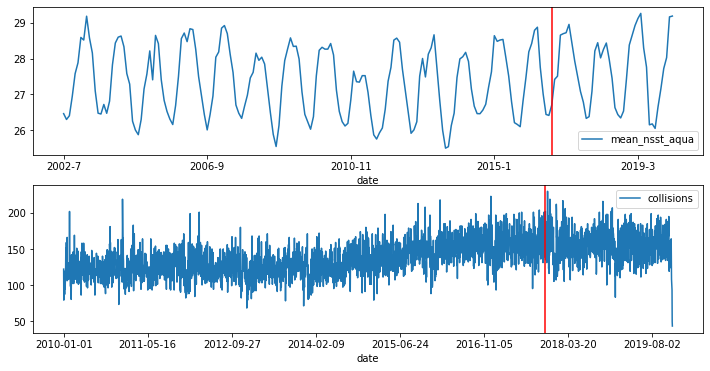

In [166]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, figsize=(12, 6))
df1.plot(x='date', y='mean_nsst_aqua', ax=ax[0])
ax[0].axvline(train_split1, color='r')
df2.plot(x='date', y='collisions', ax=ax[1])
ax[1].axvline(train_split2, color='r')

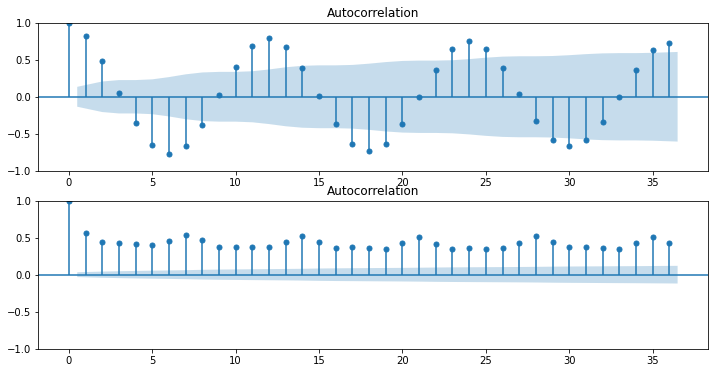

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf  # автокорреляция

fig, ax = plt.subplots(2, figsize=(12,6))
ax[0] = plot_acf(df1['mean_nsst_aqua'], ax=ax[0], lags=36)
ax[1] = plot_acf(df2['collisions'], ax=ax[1], lags=36)

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


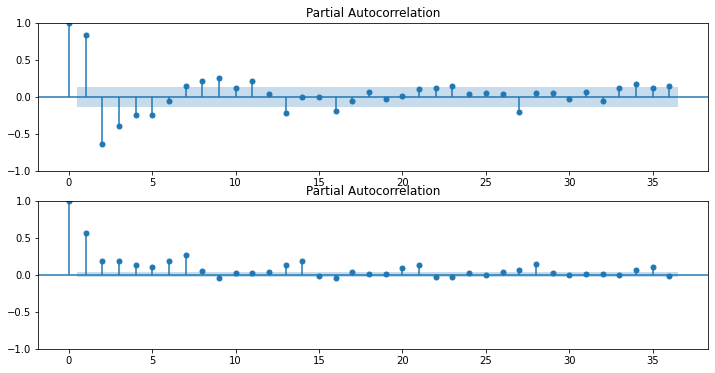

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf  # Посмотрим частичную автокорреляцию

fig, ax = plt.subplots(2, figsize=(12,6))
ax[0] = plot_pacf(df1['mean_nsst_aqua'], ax=ax[0], lags=36)
ax[1] = plot_pacf(df2['collisions'], ax=ax[1], lags=36)

Для месячного датасета температуры воды видим:

На каждом 12 лаге есть пики -> сезонность с периодом 12.


Для ежедневного датасета с температурой воздуха:

На каждом 7 лаге есть пики -> сезонность с периодом 7.

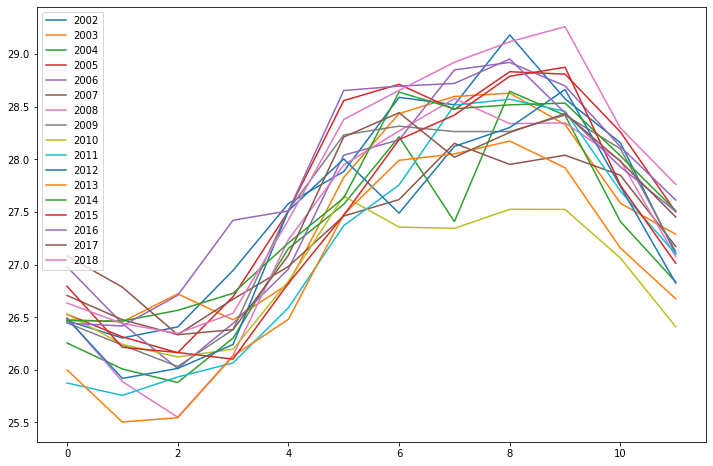

In [ ]:
# разбейте временной ряд на повторяющиеся участки по длине сезонной составляющей и нарисуйте их наложенными
fig, ax = plt.subplots(figsize=(12,8))
for year, i in enumerate(range(0, len(df1)-12, 12)):
  plt.plot(np.arange(0,12), df1[i:i+12]['mean_nsst_aqua'], label=year+2002)
plt.legend()

В следующем датасете вычитаю среднее из значений, чтобы увидеть, есть ли кластер (можно ли наблюдать сезонность) (при обилии данных так становится более наглядно). Данная идея подчерпнута из прокрустова преобразования.

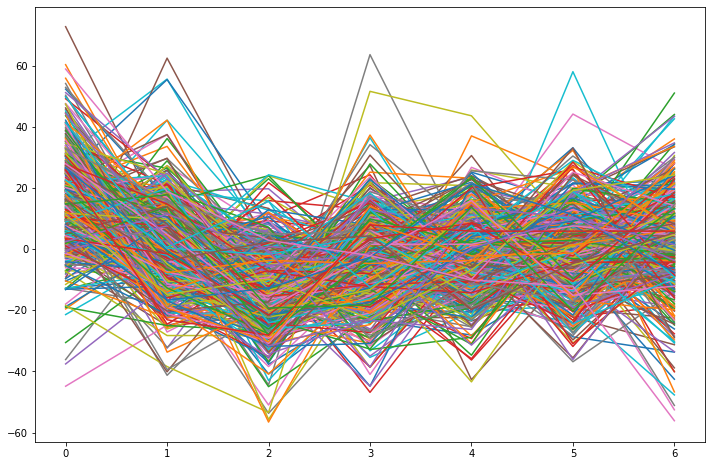

In [ ]:
T = 7
fig, ax = plt.subplots(figsize=(12,8))
for year, i in enumerate(range(0, len(df2)-T, T)):
  plt.plot(np.arange(0,T), df2[i:i+T]['collisions']-df2[i:i+T]['collisions'].mean(), label=year+2010)
#plt.legend()

## Задание 3. Предсказание месячного временного ряда (4 балла).

В этом задании Вам предстоит попробовать предсказать месячный временной ряд несколькими готовыми моделями со скользящим или растущим окном и выбрать среди них наилучшую.

В качестве метрики сравнения используйте MAE между истинными и предсказанными значениями ряда на тестовом отрезке.

### NaiveForecaster из sktime (1 балл).

Посчитайте предсказания следующими двумя наивными способами:

* $\hat{y}_{t+1} = y_{t}$
* $\hat{y}_{t+1} = y_{t-seasonality+1}$

In [ ]:
from sktime.forecasting.naive import NaiveForecaster
from sklearn.metrics import mean_absolute_error as MAE

forecaster = NaiveForecaster(strategy="last", sp=12)
forecaster.fit(y1_train,fh=np.array(range(len(y1_test))))
y1_pred = forecaster.predict().to_numpy()


In [ ]:
from sklearn.metrics import mean_absolute_error as MAE

print("MAE for monthly dataframe:", MAE(y1_test, y1_pred))

MAE for monthly dataframe: 0.6599559069767438


### ARIMA/AutoArima (1 балл).

Обучите из библиотеки `sktime` модели:

* SARIMA(1, 1, 1)(1, 0, 0)[12] (`ARIMA` в `sktime`)
* Алгоритм Хиндмана-Хандакара подбора SARIMA (`AutoARIMA` в `sktime`)

Из семинара 7:

Для построения модели ARIMA необходимы

p — порядок компоненты AR - максимальный номер коэффициента, сильно отличного от 0. Из документации: "p is the order (number of time lags) of the auto-regressive mode"

d — порядок интегрированного ряда (порядок разности временного ряда). Из документации: "d is the degree of differencing (the number of times the data have had past values subtracted)"

q — порядок компонетны MA - количество автокорреляционных коэффициентов, сильно отличных от 0. Из документации: "q is the order of the moving-average model"

Это неотрицательный целые числа.

order = (p, d, q)

In [ ]:
from sktime.forecasting.arima import ARIMA, AutoARIMA

arima = ARIMA((1, 1, 1), (1, 0, 0, 12))
arima.fit(y1_train)
y1_pred = arima.predict(fh=np.array(range(len(y1_test))))

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [ ]:
# посчитайте метрики на test
print("MAE for monthly dataframe:", MAE(y1_test, y1_pred))

MAE for monthly dataframe: 0.6891681816269526


На ежемесячном датасете показатели MAE хорошие в сравнении с ежедневным датасетом. Предполагаю, это из-за того что период подобран правильно - 12 месяцев. Для ежедневного же датасета период составляет 365, потому и качество при периоде в 12 значительно хуже, чем на месячном датасете.

In [ ]:
auto_arima = AutoARIMA(sp=12)
auto_arima.fit(y1_train)
y1_pred = auto_arima.predict(fh=np.array(range(len(y1_test))))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zer

In [ ]:
print("MAE for monthly dataframe:", MAE(y1_test, y1_pred))

MAE for monthly dataframe: 0.6184495236525773


### LGT/DLT (1 балл).

Обучите из библиотеки `orbit` модели LGT и DLT

Для дальнейшего удобства переименую колонки в датасетах:

In [ ]:
df1 = df1.rename(columns={"mean_nsst_aqua": "value"})
df2 = df2.rename(columns={"collisions": "value"})

LGTFull не был обнаружен в установленном мной модуле orbit-ml, и так как формулировка задания использовать LGT, то я заменила LGTFull на LGT

In [ ]:
from orbit.models.lgt import LGT
lgt = LGT(
    response_col='value',
    date_col='date',
    seasonality=12,
    seed=8888,
)

lgt.fit(df=df1[:train_split1])
y1_pred = lgt.predict(df=df1[train_split1:])

/usr/local/lib/python3.7/dist-packages/orbit/forecaster/forecaster.py:288: UserWarning: Datetime index is not evenly distributed
  warnings.warn('Datetime index is not evenly distributed')


In [ ]:
print("MAE for monthly dataframe:", MAE(y1_test, y1_pred['prediction']))

MAE for monthly dataframe: 0.28674862250964783


In [ ]:
from orbit.models.dlt import DLT
dlt = DLT(
    response_col='value',
    date_col='date',
    seasonality=12,
    seed=8888,
)

dlt.fit(df=df1[:train_split1])
y1_dlt = dlt.predict(df=df1[train_split1:])

print("MAE for monthly dataframe:", MAE(y1_test, y1_dlt['prediction']))

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


MAE for monthly dataframe: 0.3229656826800128


/usr/local/lib/python3.7/dist-packages/orbit/forecaster/forecaster.py:288: UserWarning: Datetime index is not evenly distributed
  warnings.warn('Datetime index is not evenly distributed')


### ETS (1 балл).

Обучите из библиотеки `sktime` модели:

* ETS(AAA) (`ExponentialSmoothing` в `sktime`)
* ETS с автоматическим выбором по AIC (`AutoETS` в `sktime`)

In [ ]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing as ETS
from sktime.forecasting.ets import AutoETS

ets = ETS(sp=12)
ets.fit(y1_train)
y1_pred = ets.predict(fh=np.array(range(len(y1_test))))

In [ ]:
# посчитайте метрики на test
print("MAE for monthly dataframe:", MAE(y1_test, y1_pred))

MAE for monthly dataframe: 1.3309000692883741


In [ ]:
aets = AutoETS()
aets.fit(y1_train)
y1_pred = aets.predict(fh=np.array(range(len(y1_test))))

In [ ]:
print("MAE for monthly dataframe:", MAE(y1_test, y1_pred))

MAE for monthly dataframe: 1.3308968554567753


Нарисуйте для наилучшей модели предсказания с доверительным интервалом (если модель выдает его) и наложите их на истинные значения. В `sktime` `ETS` модель пока ещё не выдаёт доверительные интервалы, но при желании до них можно дотянуться :)

Лучшая модель для ежемесячного датасета с температурами - DLT

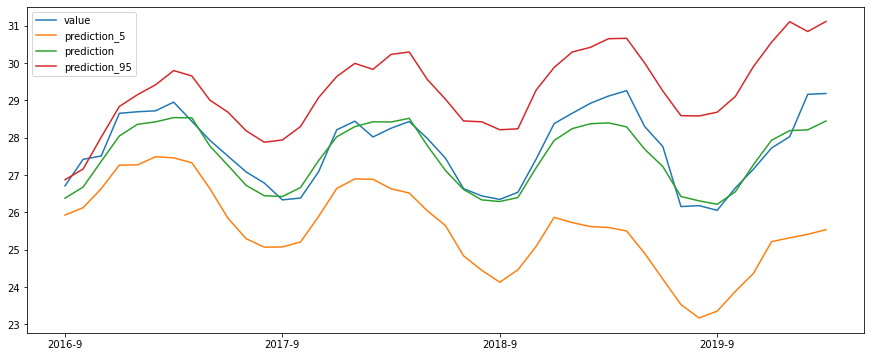

In [ ]:
# нарисуйте пресказания

fig, ax = plt.subplots(figsize=(15,6))
a = df1[train_split1:]
a = a.reset_index(drop=True)
a.plot(ax=ax)
y1_dlt.plot(ax=ax)
plt.xticks(a.index[::12], a['date'][::12])
plt.show()

## Задание 4. Предсказание дневного временного ряда (3 балла).

В этом задании Вам предстоит попробовать предсказать выбранный Вами дневной временной ряд.

Аналогично, в качестве метрики используем MAE.



### NaiveForecaster из sktime (1 балл).

Посчитайте предсказания следующими двумя наивными способами:

* $\hat{y}_{t+1} = y_{t}$
* $\hat{y}_{t+1} = y_{t-seasonality+1}$

In [ ]:
from sktime.forecasting.naive import NaiveForecaster

forecaster = NaiveForecaster(strategy="last", sp=7)
forecaster.fit(y2_train,fh=np.array(range(len(y2_test))))
y2_pred = forecaster.predict().to_numpy()

In [ ]:
# посчитайте метрики на test
print("MAE for daily dataframe:", MAE(y2_test, y2_pred))

MAE for daily dataframe: 28.156373193166885


### KTR из orbit (1 балл).



In [ ]:
from orbit.models.ktrlite import KTRLite

ktr = KTRLite(response_col='value',
    date_col='date',
    seasonality=12,
    seed=8888)
ktr.fit(df=df2[:train_split2])
y2_pred = ktr.predict(df=df2[train_split2:])

In [ ]:
# посчитайте метрики на test
print("MAE for daily dataframe:", MAE(y2_test, y2_pred['prediction']))

MAE for daily dataframe: 17.527918455660316


### Phophet (1 балл).



In [ ]:
a = pd.DataFrame()
a['ds'] = df2['date']
a['y'] = df2['value']

In [ ]:
from prophet import Prophet

prophet = Prophet()
prophet.fit(a[:train_split2])
y2_pred = prophet.predict(a[train_split2:])

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
y2_pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-10-30,160.240291,146.749007,184.555027,160.240291,160.240291,5.085789,5.085789,5.085789,-4.196615,-4.196615,-4.196615,9.282403,9.282403,9.282403,0.0,0.0,0.0,165.326079
1,2017-10-31,160.254392,146.793166,187.997685,160.254392,160.254392,7.179067,7.179067,7.179067,-2.123501,-2.123501,-2.123501,9.302568,9.302568,9.302568,0.0,0.0,0.0,167.433459
2,2017-11-01,160.268493,148.505094,186.779228,160.268493,160.268493,7.886385,7.886385,7.886385,-1.315330,-1.315330,-1.315330,9.201715,9.201715,9.201715,0.0,0.0,0.0,168.154878
3,2017-11-02,160.282594,151.020651,190.564153,160.282594,160.282594,9.655874,9.655874,9.655874,0.681378,0.681378,0.681378,8.974496,8.974496,8.974496,0.0,0.0,0.0,169.938468
4,2017-11-03,160.296695,163.703321,203.468956,160.296695,160.296695,23.751617,23.751617,23.751617,15.132840,15.132840,15.132840,8.618777,8.618777,8.618777,0.0,0.0,0.0,184.048312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,2019-11-25,170.900743,141.659724,181.082103,166.271331,175.178279,-8.870084,-8.870084,-8.870084,-4.196615,-4.196615,-4.196615,-4.673469,-4.673469,-4.673469,0.0,0.0,0.0,162.030659
757,2019-11-26,170.914844,146.183245,184.274305,166.277060,175.199055,-6.227998,-6.227998,-6.227998,-2.123501,-2.123501,-2.123501,-4.104498,-4.104498,-4.104498,0.0,0.0,0.0,164.686845
758,2019-11-27,170.928945,146.368132,186.434119,166.282790,175.219830,-4.708858,-4.708858,-4.708858,-1.315330,-1.315330,-1.315330,-3.393528,-3.393528,-3.393528,0.0,0.0,0.0,166.220087
759,2019-11-28,170.943046,148.013354,188.087939,166.288519,175.240605,-1.876309,-1.876309,-1.876309,0.681378,0.681378,0.681378,-2.557687,-2.557687,-2.557687,0.0,0.0,0.0,169.066737


In [ ]:
# посчитайте метрики на test
print("MAE for daily dataframe:", MAE(y2_test, y2_pred['yhat']))

MAE for daily dataframe: 16.82466478085206


Нарисуйте для наилучшей модели предсказания с доверительным интервалом (если модель выдает его) и наложите их на истинные значения.

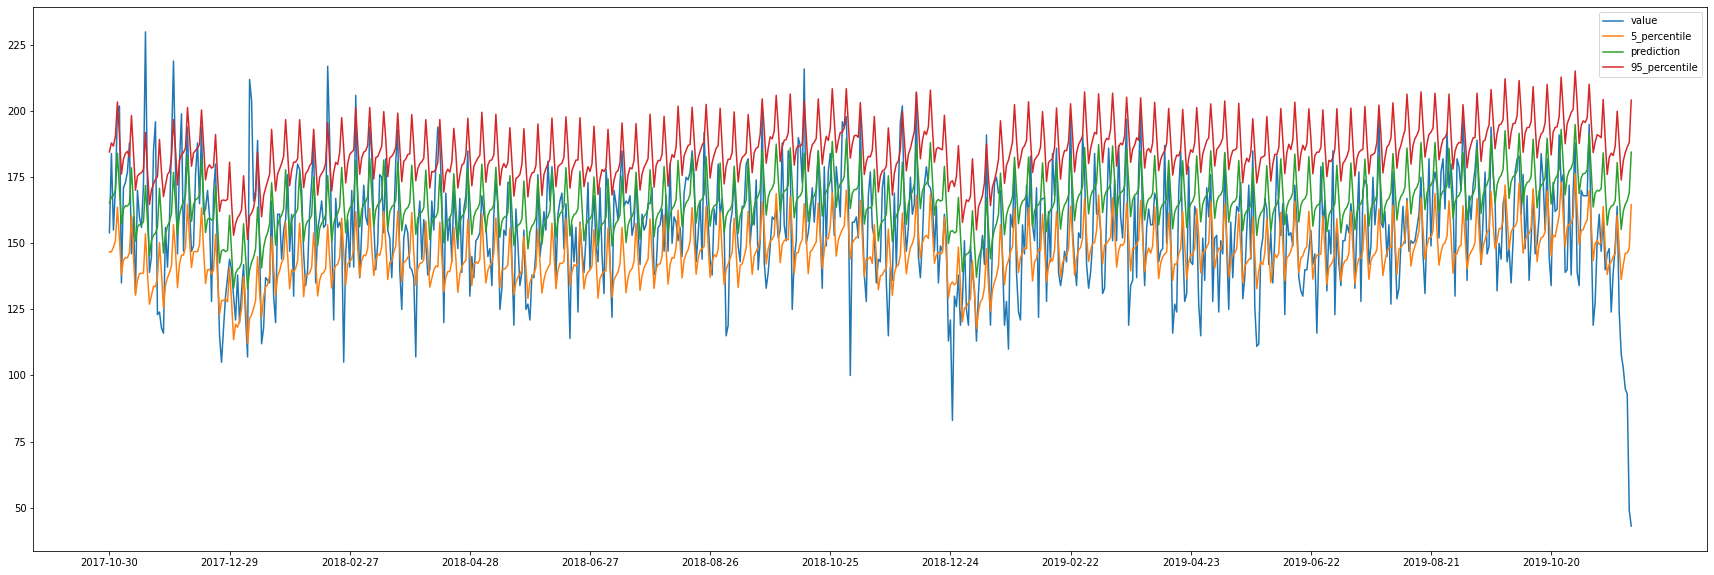

In [ ]:
# нарисуйте пресказания

fig, ax = plt.subplots(figsize=(30,10))
a = df2[train_split2:]
a = a.reset_index(drop=True)
b = y2_pred[['yhat_lower', 'yhat', 'yhat_upper']]
b = b.reset_index(drop=True)
b = b.rename(columns={"yhat": "prediction", "yhat_lower": "5_percentile", "yhat_upper": "95_percentile"})
a.plot(ax=ax)
b.plot(ax=ax)
plt.xticks(a.index[::60], a['date'][::60])
plt.show()

## Задание 5. Предсказание временного ряда моделями машинного обучения (1 балл).

Возьмите один из ваших рядов, сформируйте по нему матрицу объект-признак и целевой вектор.

Разбейте данные на train/test в той же пропорции, что разбивали в заданиях выше.

Обучите различные классические модели машинного обучения и оцените их качество (MAE). 

Какая из моделей справилась с задачей предсказания лучше всего?

In [ ]:
T = 12
a = np.array(df1['value'])
columns1 = [f'y-{i}' for i in range(T, 0, -1)]
columns1.append('y')
d1 = pd.DataFrame(columns=columns1)
for i in range(T, len(df1)):
    for j, col in enumerate(columns1[::-1]):
        d1.loc[i,col] = a[i - j]
d1.head(4)

,y-12,y-11,y-10,y-9,y-8,y-7,y-6,y-5,y-4,y-3,y-2,y-1,y
12,26.466053,26.303237,26.407822,26.944604,27.579759,27.883798,28.589013,28.517955,29.181355,28.574375,28.157195,27.100099,26.478501
13,26.303237,26.407822,26.944604,27.579759,27.883798,28.589013,28.517955,29.181355,28.574375,28.157195,27.100099,26.478501,26.456029
14,26.407822,26.944604,27.579759,27.883798,28.589013,28.517955,29.181355,28.574375,28.157195,27.100099,26.478501,26.456029,26.722174
15,26.944604,27.579759,27.883798,28.589013,28.517955,29.181355,28.574375,28.157195,27.100099,26.478501,26.456029,26.722174,26.475989


In [ ]:
T = 7
a = np.array(df2['value'])
columns2 = [f'y-{i}' for i in range(T, 0, -1)]
columns2.append('y')
d2 = pd.DataFrame(columns=columns2)
for i in range(T, len(df2)):
    for j, col in enumerate(columns2[::-1]):
        d2.loc[i,col] = a[i - j]
d2.head(4)

,y-7,y-6,y-5,y-4,y-3,y-2,y-1,y
7,122,79,99,102,112,103,87,119
8,79,99,102,112,103,87,119,103
9,99,102,112,103,87,119,103,94
10,102,112,103,87,119,103,94,104


In [ ]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(d1[columns1[:-1]], d1[columns1[-1]], test_size=0.2, shuffle=False)
X2_train, X2_test, y2_train, y2_test = train_test_split(d2[columns2[:-1]], d2[columns2[-1]], test_size=0.21, shuffle=False)

In [ ]:
X1_train

,y-12,y-11,y-10,y-9,y-8,y-7,y-6,y-5,y-4,y-3,y-2,y-1
12,26.466053,26.303237,26.407822,26.944604,27.579759,27.883798,28.589013,28.517955,29.181355,28.574375,28.157195,27.100099
13,26.303237,26.407822,26.944604,27.579759,27.883798,28.589013,28.517955,29.181355,28.574375,28.157195,27.100099,26.478501
14,26.407822,26.944604,27.579759,27.883798,28.589013,28.517955,29.181355,28.574375,28.157195,27.100099,26.478501,26.456029
15,26.944604,27.579759,27.883798,28.589013,28.517955,29.181355,28.574375,28.157195,27.100099,26.478501,26.456029,26.722174
16,27.579759,27.883798,28.589013,28.517955,29.181355,28.574375,28.157195,27.100099,26.478501,26.456029,26.722174,26.475989
...,...,...,...,...,...,...,...,...,...,...,...,...
167,27.512024,26.794785,26.214468,26.164918,26.102055,26.821321,27.468556,28.187121,28.419716,28.788988,28.874522,27.753428
168,26.794785,26.214468,26.164918,26.102055,26.821321,27.468556,28.187121,28.419716,28.788988,28.874522,27.753428,27.012492
169,26.214468,26.164918,26.102055,26.821321,27.468556,28.187121,28.419716,28.788988,28.874522,27.753428,27.012492,26.443739
170,26.164918,26.102055,26.821321,27.468556,28.187121,28.419716,28.788988,28.874522,27.753428,27.012492,26.443739,26.416685


In [ ]:
# обучите классические модели ML
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X1_train, y1_train)
y1_pred = model.predict(X1_test)
print("MAE for monthly dataframe (LinearRegression):", MAE(y1_test, y1_pred))

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
model = RandomForestRegressor()
model.fit(X1_train, y1_train)
y1_pred = model.predict(X1_test)
print("MAE for monthly dataframe (RandomForestRegressor):", MAE(y1_test, y1_pred))

model = GradientBoostingRegressor()
model.fit(X1_train, y1_train)
y1_pred = model.predict(X1_test)
print("MAE for monthly dataframe (GradientBoostingRegressorer):", MAE(y1_test, y1_pred))

from sklearn.svm import LinearSVR
model = LinearSVR()
model.fit(X1_train, y1_train)
y1_pred = model.predict(X1_test)
print("MAE for monthly dataframe (LinearSVR):", MAE(y1_test, y1_pred))



MAE for monthly dataframe (LinearRegression): 0.2772600187871346
MAE for monthly dataframe (RandomForestRegressor): 0.29341076073170563
MAE for monthly dataframe (GradientBoostingRegressorer): 0.30636803343113844
MAE for monthly dataframe (LinearSVR): 0.25327420533580347


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


В случае с ежемесячным датасетом лучше всего справилась модель LinearSVR.

In [ ]:
# from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X2_train, y2_train)
y2_pred = model.predict(X2_test)
print("MAE for daily dataframe (LinearRegression):", MAE(y2_test, y2_pred))


model = RandomForestRegressor()
model.fit(X2_train, y2_train)
y2_pred = model.predict(X2_test)
print("MAE for daily dataframe (RandomForestRegressor):", MAE(y2_test, y2_pred))

model = GradientBoostingRegressor()
model.fit(X2_train, y2_train)
y2_pred = model.predict(X2_test)
print("MAE for daily dataframe (GradientBoostingRegressorer):", MAE(y2_test, y2_pred))

model = LinearSVR()
model.fit(X2_train, y2_train)
y2_pred = model.predict(X2_test)
print("MAE for daily dataframe (LinearSVR):", MAE(y2_test, y2_pred))


MAE for daily dataframe (LinearRegression): 15.491542175864607
MAE for daily dataframe (RandomForestRegressor): 15.601185770750988
MAE for daily dataframe (GradientBoostingRegressorer): 15.537484153104751
MAE for daily dataframe (LinearSVR): 15.841339314960058


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Для предсказаний на ежедневном датасете наиболее подошла линейная регрессия, хотя и другие модели по качеству оказались несильно хуже.

## Бонус. Напишите свою модель на STAN (3 балла).

Разработайте и испытайте свою модель для месячного ряда в STAN.

Сравните качество прогнозов с наивной сезонной моделью на тестовой выборке с помощью MAE. 

Комментарий: итоговый балл за домашнее задание ставится по формуле минимум(10, ваш суммарный балл за задания).

In [ ]:
# ваш код модели на STAN и её обучения здесь

In [ ]:
# посчитайте метрики на test

In [ ]:
# нарисуйте предсказания